In [1]:
# ! pip install --upgrade bottleneck

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
apt23 = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/아파트(전월세)_실거래가_2023.csv', header=15, encoding='cp949')
apt24 = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/아파트(전월세)_실거래가_2024.csv', header=15, encoding='cp949')

In [4]:
apt23

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.8800,202312,31,...,0,2,1999,동호로10길 30,202402~202602,신규,-,NaN,NaN,아파트
1,2,서울특별시 용산구 이촌동,404,404,0,한가람,월세,59.8800,202312,31,...,45,5,1998,이촌로 201,202402~202602,갱신,사용,"50,000",80,아파트
2,3,서울특별시 용산구 이촌동,404,404,0,한가람,월세,59.8800,202312,31,...,45,5,1998,이촌로 201,-,-,-,NaN,NaN,아파트
3,4,서울특별시 용산구 도원동,23,23,0,삼성래미안,월세,84.6900,202312,31,...,140,16,2001,새창로 70,202402~202602,신규,-,NaN,NaN,아파트
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.2200,202312,31,...,0,20,1994,이촌로2가길 122,202403~202603,신규,-,NaN,NaN,아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283322,283323,서울특별시 영등포구 문래동3가,77-2,77,2,문래공원한신,전세,58.9600,202301,1,...,0,13,1988,문래로20길 14,-,-,-,NaN,NaN,아파트
283323,283324,서울특별시 영등포구 문래동3가,77-2,77,2,문래공원한신,전세,58.9600,202301,1,...,0,13,1988,문래로20길 14,202301~202501,신규,-,NaN,NaN,아파트
283324,283325,서울특별시 영등포구 영등포동2가,139,139,0,여의도리미티오148,전세,23.8902,202301,1,...,0,16,2022,버드나루로 5,202301~202501,신규,-,NaN,NaN,아파트
283325,283326,서울특별시 동작구 상도동,533,533,0,힐스테이트 상도 프레스티지,월세,84.9510,202301,1,...,28,8,2013,상도로 346-2,202501~202701,갱신,-,"72,000",0,아파트


## 전처리

#### 전월세구분 : “전세”

In [5]:
apt23_df = apt23[apt23['전월세구분']=='전세']
apt24_df = apt24[apt24['전월세구분']=='전세']

In [6]:
apt23_df['월세금(만원)'] = apt23_df['월세금(만원)'].str.replace(',', '').astype(int)
apt24_df['월세금(만원)'] = apt24_df['월세금(만원)'].str.replace(',', '').astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_26520\3222935364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['월세금(만원)'] = apt23_df['월세금(만원)'].str.replace(',', '').astype(int)
C:\Users\emily\AppData\Local\Temp\ipykernel_26520\3222935364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['월세금(만원)'] = apt24_df['월세금(만원)'].str.replace(',', '').astype(int)


#### 보증금(만원) : 전세금

In [7]:
apt23_df = apt23_df.rename(columns = {'보증금(만원)':'전세금'})
apt24_df = apt24_df.rename(columns = {'보증금(만원)':'전세금'})

In [8]:
apt23_df['전세금'] = apt23_df['전세금'].astype(str).str.replace(',', '', regex=False)
apt23_df['전세금'] = pd.to_numeric(apt23_df['전세금']).astype(int)

In [9]:
apt24_df['전세금'] = apt24_df['전세금'].astype(str).str.replace(',', '', regex=False)
apt24_df['전세금'] = pd.to_numeric(apt24_df['전세금']).astype(int)

#### 계약년월 + 계약일 ⇒ 계약시기

In [10]:
apt23_df['계약시기'] = pd.to_datetime(apt23_df['계약년월'].astype(str) + apt23_df['계약일'].astype(str))
apt24_df['계약시기'] = pd.to_datetime(apt24_df['계약년월'].astype(str) + apt24_df['계약일'].astype(str))

#### 계약년월 ⇒ 2023-06-01부터 

In [11]:
apt23_df = apt23_df[apt23_df['계약시기']>='2023-06-01']
apt23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,202312,31,...,2,1999,동호로10길 30,202402~202602,신규,-,NaN,NaN,아파트,2023-12-31
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,202312,31,...,20,1994,이촌로2가길 122,202403~202603,신규,-,NaN,NaN,아파트,2023-12-31
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,7,2010,백범로 260,-,-,-,NaN,NaN,아파트,2023-12-31
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,7,2010,백범로 260,202402~202602,신규,-,NaN,NaN,아파트,2023-12-31
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,202312,31,...,14,2016,금호로 173,-,-,-,NaN,NaN,아파트,2023-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157615,157616,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,84.91,202306,1,...,6,1990,사당로17길 52,202307~202507,갱신,사용,"72,000",0,아파트,2023-06-01
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,202306,1,...,13,1990,사당로17길 52,202308~202508,신규,-,NaN,NaN,아파트,2023-06-01
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,202306,1,...,39,2017,천호대로 1077,202308~202508,신규,-,NaN,NaN,아파트,2023-06-01
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,202306,1,...,39,2017,천호대로 1077,202308~202509,신규,-,NaN,NaN,아파트,2023-06-01


#### - 계약구분 ⇒ “-”는 “신규”
- 종전계약보증금(만원)의 경우 “신규”계약에 존재

In [12]:
apt23_df['종전계약 보증금(만원)'] = apt23_df['종전계약 보증금(만원)'].fillna(0)
apt24_df['종전계약 보증금(만원)'] = apt24_df['종전계약 보증금(만원)'].fillna(0)

In [13]:
apt23_df['계약구분'] = apt23_df['계약구분'].replace('-', '신규')
apt23_df['계약구분'].value_counts()

계약구분
신규    68394
갱신    24926
Name: count, dtype: int64

In [14]:
apt24_df['계약구분'] = apt24_df['계약구분'].replace('-', '신규')
apt24_df['계약구분'].value_counts()

계약구분
신규    98162
갱신    45707
Name: count, dtype: int64

In [15]:
apt23_df[(apt23_df['계약구분']=='신규')&(apt23_df['종전계약 보증금(만원)'] != 0)]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기


In [16]:
apt24_df[(apt24_df['계약구분']=='신규')&(apt24_df['종전계약 보증금(만원)'] != 0)]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기


#### 구 / 동 

In [17]:
apt23_df['구'] = apt23_df['시군구'].str.extract(r'(\S+구)')
apt23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,202312,31,...,1999,동호로10길 30,202402~202602,신규,-,0,NaN,아파트,2023-12-31,중구
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,202312,31,...,1994,이촌로2가길 122,202403~202603,신규,-,0,NaN,아파트,2023-12-31,용산구
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,2010,백범로 260,-,신규,-,0,NaN,아파트,2023-12-31,용산구
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,2010,백범로 260,202402~202602,신규,-,0,NaN,아파트,2023-12-31,용산구
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,202312,31,...,2016,금호로 173,-,신규,-,0,NaN,아파트,2023-12-31,성동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157615,157616,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,84.91,202306,1,...,1990,사당로17길 52,202307~202507,갱신,사용,"72,000",0,아파트,2023-06-01,동작구
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,202306,1,...,1990,사당로17길 52,202308~202508,신규,-,0,NaN,아파트,2023-06-01,동작구
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,202306,1,...,2017,천호대로 1077,202308~202508,신규,-,0,NaN,아파트,2023-06-01,강동구
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,202306,1,...,2017,천호대로 1077,202308~202509,신규,-,0,NaN,아파트,2023-06-01,강동구


In [18]:
apt23_df['동'] = apt23_df['시군구'].str.split().str[-1]
apt23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구,동
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,202312,31,...,동호로10길 30,202402~202602,신규,-,0,NaN,아파트,2023-12-31,중구,신당동
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,202312,31,...,이촌로2가길 122,202403~202603,신규,-,0,NaN,아파트,2023-12-31,용산구,이촌동
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,백범로 260,-,신규,-,0,NaN,아파트,2023-12-31,용산구,효창동
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,백범로 260,202402~202602,신규,-,0,NaN,아파트,2023-12-31,용산구,효창동
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,202312,31,...,금호로 173,-,신규,-,0,NaN,아파트,2023-12-31,성동구,금호동2가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157615,157616,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,84.91,202306,1,...,사당로17길 52,202307~202507,갱신,사용,"72,000",0,아파트,2023-06-01,동작구,사당동
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,202306,1,...,사당로17길 52,202308~202508,신규,-,0,NaN,아파트,2023-06-01,동작구,사당동
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,202306,1,...,천호대로 1077,202308~202508,신규,-,0,NaN,아파트,2023-06-01,강동구,천호동
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,202306,1,...,천호대로 1077,202308~202509,신규,-,0,NaN,아파트,2023-06-01,강동구,천호동


In [19]:
apt24_df['구'] = apt24_df['시군구'].str.extract(r'(\S+구)')
apt24_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구
1,2,서울특별시 종로구 창신동,328-17,328,17,동대문,전세,28.80,202412,31,...,1966,지봉로 25,202502~202702,신규,-,0,NaN,아파트,2024-12-31,종로구
3,4,서울특별시 용산구 이촌동,404,404,0,한가람,전세,114.96,202412,31,...,1998,이촌로65가길 23,202502~202702,신규,-,0,NaN,아파트,2024-12-31,용산구
6,7,서울특별시 용산구 효창동,287,287,0,용산롯데캐슬센터포레,전세,59.79,202412,31,...,2019,백범로 313,202412~202612,신규,-,0,NaN,아파트,2024-12-31,용산구
13,14,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,202412,31,...,1999,동호로10길 30,202501~202701,신규,-,0,NaN,아파트,2024-12-31,중구
14,15,서울특별시 중구 신당동,432-1957,432,1957,신신(2차),전세,59.98,202412,31,...,2001,동호로11자길 22,202502~202702,갱신,-,"22,000",0,아파트,2024-12-31,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249749,249750,서울특별시 영등포구 여의도동,21-2,21,2,공작,전세,93.06,202401,1,...,1976,여의대로6길 17,202401~202601,갱신,-,"40,000",0,아파트,2024-01-01,영등포구
249751,249752,서울특별시 성동구 하왕십리동,1071,1071,0,왕십리자이,전세,51.94,202401,1,...,2017,난계로 100,202411~202611,갱신,사용,"47,900",0,아파트,2024-01-01,성동구
249756,249757,서울특별시 서대문구 북아현동,1009,1009,0,두산,전세,59.96,202401,1,...,1999,이화여대8길 62,202401~202501,갱신,-,"30,000",10,아파트,2024-01-01,서대문구
249757,249758,서울특별시 송파구 장지동,847,847,0,송파파인타운6단지,전세,84.98,202401,1,...,2008,충민로6길 14,202402~202602,신규,-,0,NaN,아파트,2024-01-01,송파구


In [20]:
apt24_df['동'] = apt24_df['시군구'].str.split().str[-1]
apt24_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구,동
1,2,서울특별시 종로구 창신동,328-17,328,17,동대문,전세,28.80,202412,31,...,지봉로 25,202502~202702,신규,-,0,NaN,아파트,2024-12-31,종로구,창신동
3,4,서울특별시 용산구 이촌동,404,404,0,한가람,전세,114.96,202412,31,...,이촌로65가길 23,202502~202702,신규,-,0,NaN,아파트,2024-12-31,용산구,이촌동
6,7,서울특별시 용산구 효창동,287,287,0,용산롯데캐슬센터포레,전세,59.79,202412,31,...,백범로 313,202412~202612,신규,-,0,NaN,아파트,2024-12-31,용산구,효창동
13,14,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,202412,31,...,동호로10길 30,202501~202701,신규,-,0,NaN,아파트,2024-12-31,중구,신당동
14,15,서울특별시 중구 신당동,432-1957,432,1957,신신(2차),전세,59.98,202412,31,...,동호로11자길 22,202502~202702,갱신,-,"22,000",0,아파트,2024-12-31,중구,신당동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249749,249750,서울특별시 영등포구 여의도동,21-2,21,2,공작,전세,93.06,202401,1,...,여의대로6길 17,202401~202601,갱신,-,"40,000",0,아파트,2024-01-01,영등포구,여의도동
249751,249752,서울특별시 성동구 하왕십리동,1071,1071,0,왕십리자이,전세,51.94,202401,1,...,난계로 100,202411~202611,갱신,사용,"47,900",0,아파트,2024-01-01,성동구,하왕십리동
249756,249757,서울특별시 서대문구 북아현동,1009,1009,0,두산,전세,59.96,202401,1,...,이화여대8길 62,202401~202501,갱신,-,"30,000",10,아파트,2024-01-01,서대문구,북아현동
249757,249758,서울특별시 송파구 장지동,847,847,0,송파파인타운6단지,전세,84.98,202401,1,...,충민로6길 14,202402~202602,신규,-,0,NaN,아파트,2024-01-01,송파구,장지동


In [21]:
apt23_df.isnull().sum()

NO                  0
시군구                 0
번지                  0
본번                  0
부번                  0
단지명                 0
전월세구분               0
전용면적(㎡)             0
계약년월                0
계약일                 0
전세금                 0
월세금(만원)             0
층                   0
건축년도                0
도로명                 0
계약기간                0
계약구분                0
갱신요구권 사용            0
종전계약 보증금(만원)        0
종전계약 월세(만원)     68394
주택유형                0
계약시기                0
구                   0
동                   0
dtype: int64

#### 종전계약월세(만원) ≠ 0인 경우

In [22]:
apt23_df[apt23_df['월세금(만원)']!=0]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구,동


In [23]:
apt24_df[apt24_df['월세금(만원)']!=0]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구,동


In [24]:
apt23_df['종전계약 월세(만원)'] = apt23_df['종전계약 월세(만원)'].fillna(0)
apt24_df['종전계약 월세(만원)'] = apt24_df['종전계약 월세(만원)'].fillna(0)

In [25]:
apt23_df['종전계약 월세(만원)'] = (
    apt23_df['종전계약 월세(만원)']
    .replace(',', '', regex=True)               # 쉼표 제거
    .replace('', np.nan)                        # 빈 문자열 → NaN
    .astype(float)                              # float으로 변환 (NaN 처리 포함)
    .fillna(0)                                  # NaN을 0으로 처리 (원하는 방식으로 조정)
    .astype(int)                                # 최종적으로 int로 변환
)

In [26]:
apt24_df['종전계약 월세(만원)'] = (
    apt24_df['종전계약 월세(만원)']
    .replace(',', '', regex=True)               # 쉼표 제거
    .replace('', np.nan)                        # 빈 문자열 → NaN
    .astype(float)                              # float으로 변환 (NaN 처리 포함)
    .fillna(0)                                  # NaN을 0으로 처리 (원하는 방식으로 조정)
    .astype(int)                                # 최종적으로 int로 변환
)

In [27]:
apt23_df[apt23_df['종전계약 월세(만원)']!=0]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구,동
255,256,서울특별시 송파구 방이동,89,89,0,올림픽선수기자촌3단지,전세,100.31,202312,30,...,양재대로 1218,202402~202602,갱신,-,"80,000",78,아파트,2023-12-30,송파구,방이동
1094,1095,서울특별시 광진구 자양동,507-6,507,6,이튼타워리버2차,전세,84.61,202312,29,...,능동로 50,202403~202503,갱신,-,"90,000",60,아파트,2023-12-29,광진구,자양동
1101,1102,서울특별시 강동구 상일동,476,476,0,중앙하이츠,전세,59.94,202312,29,...,구천면로 557,202403~202603,갱신,-,"25,000",20,아파트,2023-12-29,강동구,상일동
1250,1251,서울특별시 성동구 옥수동,528-1,528,1,옥수파크힐스117동~125동,전세,59.59,202312,29,...,매봉길 50,202401~202501,갱신,-,"61,400",40,아파트,2023-12-29,성동구,옥수동
1260,1261,서울특별시 용산구 이촌동,411,411,0,동아그린,전세,84.82,202312,29,...,이촌로 100-8,202403~202603,갱신,-,"50,000",70,아파트,2023-12-29,용산구,이촌동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156091,156092,서울특별시 송파구 풍납동,508,508,0,한강극동,전세,59.26,202306,2,...,토성로 38-6,202307~202507,갱신,-,"29,880",20,아파트,2023-06-02,송파구,풍납동
156236,156237,서울특별시 노원구 월계동,556,556,0,주공2,전세,59.97,202306,2,...,초안산로1길 18,202306~202506,갱신,사용,"10,000",60,아파트,2023-06-02,노원구,월계동
156505,156506,서울특별시 영등포구 신길동,4950,4950,0,래미안에스티움,전세,84.92,202306,2,...,신풍로 77,202307~202507,갱신,사용,"65,000",60,아파트,2023-06-02,영등포구,신길동
156627,156628,서울특별시 광진구 자양동,787,787,0,자양삼성,전세,84.96,202306,2,...,뚝섬로40길 45,202309~202509,갱신,-,"60,000",50,아파트,2023-06-02,광진구,자양동


In [28]:
apt23_df[apt23_df['종전계약 월세(만원)']!=0]['계약구분'].value_counts()

계약구분
갱신    1110
Name: count, dtype: int64

In [29]:
apt24_df[apt24_df['종전계약 월세(만원)']!=0]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구,동
33,34,서울특별시 광진구 자양동,690-58,690,58,파라다이스리버빌,전세,185.04,202412,31,...,자양로4나길 44,202501~202605,갱신,-,"60,000",135,아파트,2024-12-31,광진구,자양동
202,203,서울특별시 양천구 신정동,327,327,0,목동신시가지13,전세,53.90,202412,31,...,목동동로 100,202503~202703,갱신,-,"29,000",15,아파트,2024-12-31,양천구,신정동
458,459,서울특별시 동작구 흑석동,335,335,0,흑석한강센트레빌,전세,59.95,202412,31,...,흑석한강로 12,202412~202612,갱신,-,"20,000",100,아파트,2024-12-31,동작구,흑석동
839,840,서울특별시 송파구 가락동,913,913,0,헬리오시티,전세,84.98,202412,30,...,송파대로 345,202501~202701,갱신,-,"70,000",50,아파트,2024-12-30,송파구,가락동
848,849,서울특별시 서대문구 남가좌동,389,389,0,DMC에코자이,전세,59.79,202412,30,...,거북골로 84,202501~202801,갱신,-,"40,000",26,아파트,2024-12-30,서대문구,남가좌동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248701,248702,서울특별시 송파구 신천동,17,17,0,파크리오,전세,84.79,202401,3,...,올림픽로 435,202401~202502,갱신,사용,"100,000",60,아파트,2024-01-03,송파구,신천동
249076,249077,서울특별시 중랑구 상봉동,90-3,90,3,봄작시티24,전세,18.23,202401,3,...,망우로50길 24,202401~202507,갱신,-,"3,000",89,아파트,2024-01-03,중랑구,상봉동
249403,249404,서울특별시 송파구 신천동,7,7,0,장미1,전세,82.45,202401,2,...,올림픽로35길 104,202403~202603,갱신,사용,"60,000",45,아파트,2024-01-02,송파구,신천동
249573,249574,서울특별시 관악구 봉천동,1728,1728,0,관악파크푸르지오,전세,84.98,202401,2,...,행운10길 21,-,갱신,-,"30,000",60,아파트,2024-01-02,관악구,봉천동


In [30]:
apt24_df[apt24_df['종전계약 월세(만원)']!=0]['계약구분'].value_counts()

계약구분
갱신    1713
Name: count, dtype: int64

In [31]:
apt23_df['전세전환_갱신'] = (apt23_df['종전계약 월세(만원)'] != 0).astype(int)
apt24_df['전세전환_갱신'] = (apt24_df['종전계약 월세(만원)'] != 0).astype(int)

#### 계약개월수 : 계약 기간

In [32]:
def calculate_month_difference(contract_period_str):
    try:
        start_date_str, end_date_str = contract_period_str.split('~')
        
        # 시작 년도와 월 추출
        start_year = int(start_date_str[:4])
        start_month = int(start_date_str[4:])
        
        # 종료 년도와 월 추출
        end_year = int(end_date_str[:4])
        end_month = int(end_date_str[4:])
        
        # 개월수 차이 계산
        # (종료년도 - 시작년도) * 12 + (종료월 - 시작월)
        month_difference = (end_year - start_year) * 12 + (end_month - start_month)
        
        return month_difference
    except Exception as e:
        return float('nan')

In [33]:
# '계약기간' 컬럼에 함수 적용하여 새로운 컬럼 생성
apt23_df['계약개월수'] = apt23_df['계약기간'].apply(calculate_month_difference)
apt23_df['계약개월수']

0         24.0
4         24.0
5          NaN
6         24.0
9          NaN
          ... 
157615    24.0
157616    24.0
157620    24.0
157621    25.0
157625     NaN
Name: 계약개월수, Length: 93320, dtype: float64

In [34]:
# '계약기간' 컬럼에 함수 적용하여 새로운 컬럼 생성
apt24_df['계약개월수'] = apt24_df['계약기간'].apply(calculate_month_difference)
apt24_df['계약개월수']

1         24.0
3         24.0
6         24.0
13        24.0
14        24.0
          ... 
249749    24.0
249751    24.0
249756    12.0
249757    24.0
249758    24.0
Name: 계약개월수, Length: 143869, dtype: float64

In [35]:
apt23_df['계약개월수'].value_counts()

계약개월수
 24.0      69975
 23.0       1349
 12.0       1233
 25.0        307
 18.0        220
 26.0        207
 36.0        160
 22.0        159
 27.0        143
 48.0        133
 16.0        122
 17.0        115
 15.0        111
 14.0        100
 30.0         88
 20.0         88
 13.0         87
 19.0         87
 21.0         86
 28.0         83
 6.0          78
 3.0          75
 2.0          71
 11.0         66
 29.0         66
 7.0          65
 1.0          54
 5.0          49
 8.0          45
 4.0          41
 10.0         37
 31.0         28
 9.0          26
 34.0         18
 32.0         17
 60.0         17
 33.0         12
 37.0          9
 35.0          8
 0.0           6
 72.0          5
 38.0          4
 47.0          3
-1.0           3
 3624.0        3
 50.0          2
 59.0          2
 43.0          2
 45.0          2
 84.0          2
 49.0          1
 42.0          1
 51.0          1
 3627.0        1
 40.0          1
 120.0         1
 52.0          1
 41.0          1
Name: co

#### 계약 기간 누락인 경우

In [36]:
apt23_df[apt23_df['계약개월수'].isna()]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,계약시기,구,동,전세전환_갱신,계약개월수
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.4100,202312,31,...,신규,-,0,0,아파트,2023-12-31,용산구,효창동,0,NaN
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.9800,202312,31,...,신규,-,0,0,아파트,2023-12-31,성동구,금호동2가,0,NaN
16,17,서울특별시 성북구 종암동,104-1,104,1,종암에스케이,전세,59.0400,202312,31,...,신규,-,0,0,아파트,2023-12-31,성북구,종암동,0,NaN
19,20,서울특별시 성북구 하월곡동,226,226,0,월곡래미안루나밸리,전세,84.8800,202312,31,...,신규,-,0,0,아파트,2023-12-31,성북구,하월곡동,0,NaN
29,30,서울특별시 송파구 풍납동,514,514,0,잠실올림픽공원아이파크,전세,59.9700,202312,31,...,신규,-,0,0,아파트,2023-12-31,송파구,풍납동,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157576,157577,서울특별시 동작구 상도동,415,415,0,중앙하이츠빌,전세,84.9883,202306,1,...,신규,-,0,0,아파트,2023-06-01,동작구,상도동,0,NaN
157581,157582,서울특별시 관악구 신림동,1704-1,1704,1,주공1,전세,59.5000,202306,1,...,신규,-,0,0,아파트,2023-06-01,관악구,신림동,0,NaN
157582,157583,서울특별시 관악구 신림동,1458-6,1458,6,쎄븐스에비뉴,전세,24.4100,202306,1,...,신규,-,0,0,아파트,2023-06-01,관악구,신림동,0,NaN
157589,157590,서울특별시 관악구 신림동,1704-1,1704,1,주공1,전세,59.5000,202306,1,...,신규,-,0,0,아파트,2023-06-01,관악구,신림동,0,NaN


In [37]:
apt23_df[apt23_df['계약개월수'].isna()]['계약구분'].value_counts()

계약구분
신규    16544
갱신     1099
Name: count, dtype: int64

In [38]:
# 조건: 계약구분이 '신규'이고 계약 시기가 결측이 아닌 경우
condition = (apt23_df['계약구분'] == '신규') & (apt23_df['계약시기'].notna())

# 이 조건을 만족하면서 계약개월수가 NaN인 경우에만 24로 채움
apt23_df.loc[condition & (apt23_df['계약개월수'].isna()), '계약개월수'] = 24

# 계약 개월 수가 결측(NaN)이고, 갱신 + 갱신요구권 사용 == '사용'인 경우 → 24개월로 채움
condition1 = (
    apt23_df['계약개월수'].isna() & # '계약개월수'가 NaN인 경우를 확인
    (apt23_df['계약구분'] == '갱신') &
    (apt23_df['갱신요구권 사용'].isin(['사용', 'O']))
)
apt23_df.loc[condition1, '계약개월수'] = 24

In [39]:
# 조건: 계약구분이 '신규'이고 계약 시기가 결측이 아닌 경우
condition = (apt24_df['계약구분'] == '신규') & (apt24_df['계약시기'].notna())

# 이 조건을 만족하면서 계약개월수가 NaN인 경우에만 24로 채움
apt24_df.loc[condition & (apt24_df['계약개월수'].isna()), '계약개월수'] = 24

# 계약 개월 수가 결측(NaN)이고, 갱신 + 갱신요구권 사용 == '사용'인 경우 → 24개월로 채움
condition1 = (
    apt24_df['계약개월수'].isna() & # '계약개월수'가 NaN인 경우를 확인
    (apt24_df['계약구분'] == '갱신') &
    (apt24_df['갱신요구권 사용'].isin(['사용', 'O']))
)
apt24_df.loc[condition1, '계약개월수'] = 24

In [40]:
# 갱신인 경우 계약 개월 수 nan 값 처리 못함 -> 모델링에서 쓰는 것으로 컬럼 처리
# 계약개월수 NaN 여부 플래그 추가
apt23_df['is_계약개월수_missing'] = apt23_df['계약개월수'].isna().astype(int)
# 남은 NaN을 -1로 대체
apt23_df['계약개월수'].fillna(-1, inplace=True)

C:\Users\emily\AppData\Local\Temp\ipykernel_26520\1080698309.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apt23_df['계약개월수'].fillna(-1, inplace=True)


In [41]:
# 갱신인 경우 계약 개월 수 nan 값 처리 못함 -> 모델링에서 쓰는 것으로 컬럼 처리
# 계약개월수 NaN 여부 플래그 추가
apt24_df['is_계약개월수_missing'] = apt24_df['계약개월수'].isna().astype(int)
# 남은 NaN을 -1로 대체
apt24_df['계약개월수'].fillna(-1, inplace=True)

C:\Users\emily\AppData\Local\Temp\ipykernel_26520\2907873934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apt24_df['계약개월수'].fillna(-1, inplace=True)


In [42]:
# --- 2. '갱신요구권 사용' 컬럼 처리 (도메인 지식 반영하여 세분화) ---

# 2-1. '갱신요구권 사용'의 원래 결측 여부를 나타내는 플래그 생성 (옵션이지만 권장)
# 이 플래그는 나중에 범주화된 값이 원래 결측이었는지 여부를 알려줍니다.
apt23_df['is_갱신요구권_사용_originally_missing'] = apt23_df['갱신요구권 사용'].isna().astype(int)


# 2-2. '계약구분'이 '신규'인 경우 '갱신요구권 사용'을 '해당없음'으로 설정
apt23_df.loc[apt23_df['계약구분'] == '신규', '갱신요구권 사용'] = '해당없음'

# 2-3. '계약구분'이 '갱신'인데 '갱신요구권 사용'이 결측(NaN)이거나 특정 미사용 값인 경우 '사용하지 않음'으로 설정
# 여기서는 np.nan, '-', '' (빈 문자열)을 미사용으로 간주합니다.
apt23_df.loc[
    (apt23_df['계약구분'] == '갱신') &
    (apt23_df['갱신요구권 사용'].isin([np.nan, '-', ' '])), # NaN 또는 '-' 또는 빈 문자열
    '갱신요구권 사용'
] = '미사용'

In [43]:
# --- 2. '갱신요구권 사용' 컬럼 처리 (도메인 지식 반영하여 세분화) ---

# 2-1. '갱신요구권 사용'의 원래 결측 여부를 나타내는 플래그 생성 (옵션이지만 권장)
# 이 플래그는 나중에 범주화된 값이 원래 결측이었는지 여부를 알려줍니다.
apt24_df['is_갱신요구권_사용_originally_missing'] = apt24_df['갱신요구권 사용'].isna().astype(int)


# 2-2. '계약구분'이 '신규'인 경우 '갱신요구권 사용'을 '해당없음'으로 설정
apt24_df.loc[apt24_df['계약구분'] == '신규', '갱신요구권 사용'] = '해당없음'

# 2-3. '계약구분'이 '갱신'인데 '갱신요구권 사용'이 결측(NaN)이거나 특정 미사용 값인 경우 '사용하지 않음'으로 설정
# 여기서는 np.nan, '-', '' (빈 문자열)을 미사용으로 간주합니다.
apt24_df.loc[
    (apt24_df['계약구분'] == '갱신') &
    (apt24_df['갱신요구권 사용'].isin([np.nan, '-', ' '])), # NaN 또는 '-' 또는 빈 문자열
    '갱신요구권 사용'
] = '미사용'

In [44]:
apt23_df['is_갱신요구권_사용_originally_missing'].value_counts()

is_갱신요구권_사용_originally_missing
0    93320
Name: count, dtype: int64

In [45]:
apt_df = pd.concat([apt23_df,apt24_df])

In [46]:
# 2-1. 'is_건축년도_missing' 이진(Binary) 컬럼 추가
# '건축년도' 컬럼의 원래 값이 NaN(결측)이었다면 1, 아니면 0을 반환합니다.
apt_df['is_건축년도_missing'] = apt_df['건축년도'].isna().astype(int)

# 2-2. '건축년도'의 남은 NaN 값을 -1로 대체
# 실제 건축년도와 겹치지 않으면서 모델이 '결측값'으로 인식할 수 있는 값(-1)으로 채웁니다.
apt_df['건축년도'].fillna(-1, inplace=True)

C:\Users\emily\AppData\Local\Temp\ipykernel_26520\442173873.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apt_df['건축년도'].fillna(-1, inplace=True)


In [47]:
apt_df['주택유형'].value_counts()

주택유형
아파트    237189
Name: count, dtype: int64

In [48]:
apt_df.isnull().sum()

NO                                0
시군구                               0
번지                                0
본번                                0
부번                                0
단지명                               0
전월세구분                             0
전용면적(㎡)                           0
계약년월                              0
계약일                               0
전세금                               0
월세금(만원)                           0
층                                 0
건축년도                              0
도로명                               0
계약기간                              0
계약구분                              0
갱신요구권 사용                          0
종전계약 보증금(만원)                      0
종전계약 월세(만원)                       0
주택유형                              0
계약시기                              0
구                                 0
동                                 0
전세전환_갱신                           0
계약개월수                             0
is_계약개월수_missing                  0
is_갱신요구권_사용_originally_missi

In [49]:
apt_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,종전계약 월세(만원),주택유형,계약시기,구,동,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,202312,31,...,0,아파트,2023-12-31,중구,신당동,0,24.0,0,0,0
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,202312,31,...,0,아파트,2023-12-31,용산구,이촌동,0,24.0,0,0,0
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,0,아파트,2023-12-31,용산구,효창동,0,24.0,0,0,0
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,0,아파트,2023-12-31,용산구,효창동,0,24.0,0,0,0
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,202312,31,...,0,아파트,2023-12-31,성동구,금호동2가,0,24.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249749,249750,서울특별시 영등포구 여의도동,21-2,21,2,공작,전세,93.06,202401,1,...,0,아파트,2024-01-01,영등포구,여의도동,0,24.0,0,0,0
249751,249752,서울특별시 성동구 하왕십리동,1071,1071,0,왕십리자이,전세,51.94,202401,1,...,0,아파트,2024-01-01,성동구,하왕십리동,0,24.0,0,0,0
249756,249757,서울특별시 서대문구 북아현동,1009,1009,0,두산,전세,59.96,202401,1,...,10,아파트,2024-01-01,서대문구,북아현동,1,12.0,0,0,0
249757,249758,서울특별시 송파구 장지동,847,847,0,송파파인타운6단지,전세,84.98,202401,1,...,0,아파트,2024-01-01,송파구,장지동,0,24.0,0,0,0


In [50]:
apt_df.columns

Index(['NO', '시군구', '번지', '본번', '부번', '단지명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일',
       '전세금', '월세금(만원)', '층', '건축년도', '도로명', '계약기간', '계약구분', '갱신요구권 사용',
       '종전계약 보증금(만원)', '종전계약 월세(만원)', '주택유형', '계약시기', '구', '동', '전세전환_갱신',
       '계약개월수', 'is_계약개월수_missing', 'is_갱신요구권_사용_originally_missing',
       'is_건축년도_missing'],
      dtype='object')

## 자치구별 평균 전세 보증금

## 건축년도별 보증금 변화 추이

## 보증금 상관관계

#### 보증금과 거래건수 상관관계

In [51]:
deposit_count = apt_df['전세금'].value_counts().reset_index(name='거래건수')
deposit_count

,전세금,거래건수
0,50000,7627
1,60000,6773
2,40000,6309
3,45000,6080
4,55000,5745
...,...,...
5771,31490,1
5772,40050,1
5773,62580,1
5774,69825,1


In [52]:
deposit_count['전세금'].corr(deposit_count['거래건수'])

0.00820162883291163

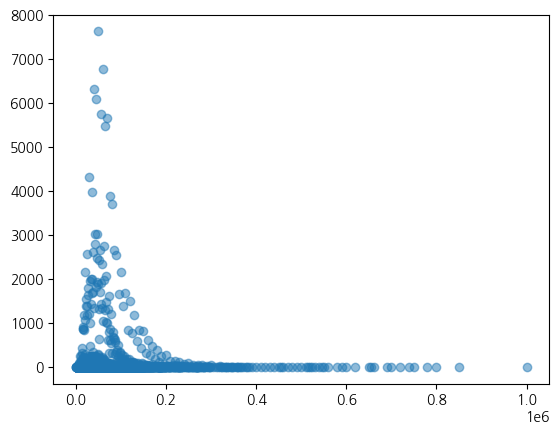

In [53]:
plt.scatter(deposit_count['전세금'],deposit_count['거래건수'], alpha=0.5)

#### 보증금과 건축년도 상관관계

In [54]:
apt_df['전세금'].corr(apt_df['건축년도'])

0.25902281649638953

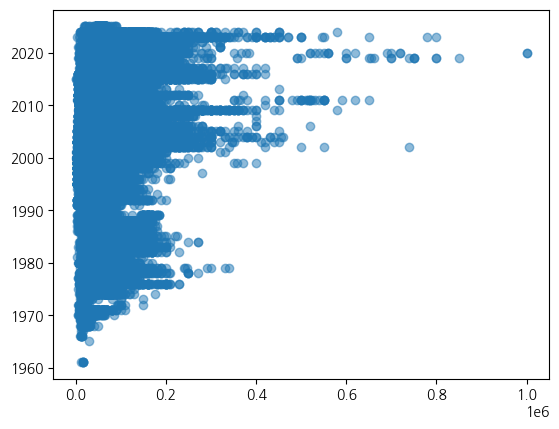

In [55]:
plt.scatter(apt_df['전세금'],apt_df['건축년도'], alpha=0.5)

#### 보증금과 전용면적간의 상관관계

In [56]:
apt_df['전세금'].corr(apt_df['전용면적(㎡)'])

0.6226215630969766

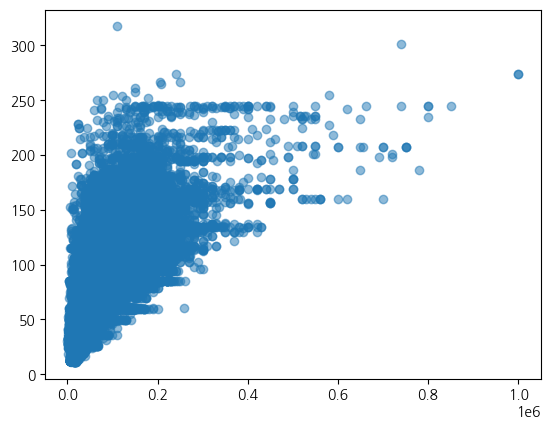

In [57]:
plt.scatter(apt_df['전세금'],apt_df['전용면적(㎡)'], alpha=0.5)

## 자치구별 거래건수 집계

In [58]:
combined_df = apt_df['구'].value_counts().reset_index(name='거래건수')
combined_df

,구,거래건수
0,강남구,20915
1,송파구,19825
2,노원구,19035
3,강동구,15668
4,강서구,15288
5,서초구,14995
6,양천구,12365
7,영등포구,10953
8,마포구,10236
9,성동구,9502


## 지도 시각화

In [59]:
# ! pip install --upgrade openpyxl

In [60]:
seoul_map = pd.read_excel('D:/SDC_project/map_visualization/서울시_행정동_좌표.xlsx')
seoul_map

,code,sido,gu,dong,lat,lng
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [61]:
seoul_map = seoul_map.rename(columns={'gu':'구','dong':'동','lat':'위도','lng':'경도'})
seoul_map

,code,sido,구,동,위도,경도
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [62]:
gu_coords_df = seoul_map[['구','위도','경도']]
combined_with_coords = pd.merge(combined_df, gu_coords_df, on=['구'], how='left')
combined_with_coords

,구,거래건수,위도,경도
0,강남구,20915,37.523807,127.026492
1,강남구,20915,37.511498,127.028552
2,강남구,20915,37.517353,127.037164
3,강남구,20915,37.530734,127.028461
4,강남구,20915,37.524399,127.050457
...,...,...,...,...
886,종로구,1689,37.610420,126.969837
887,종로구,1689,37.594148,126.964248
888,종로구,1689,37.600310,126.957773
889,종로구,1689,37.602696,126.961378


In [63]:
combined_with_coords.to_csv('combined_coords_apt.csv')

#### 아파트 전세 거래 분포

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt

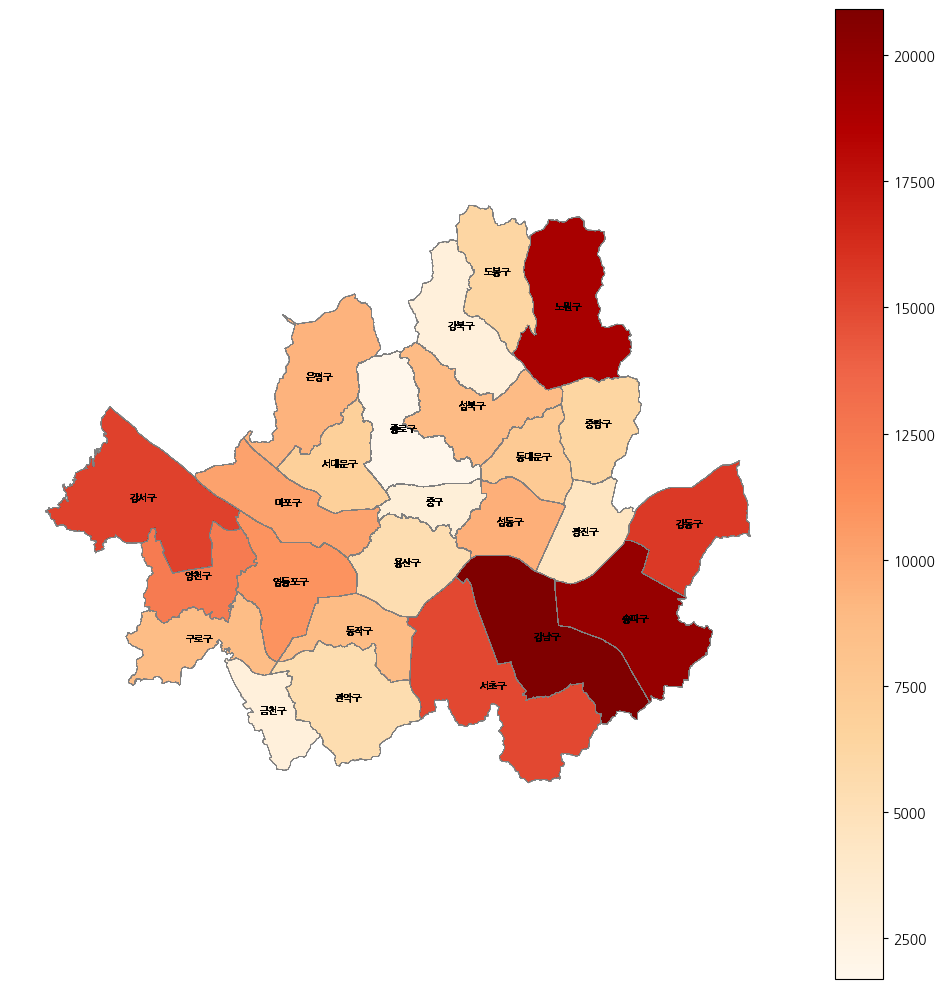

In [65]:
df = pd.read_csv('D:/SDC_project/combined_coords_apt.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/map_visualization/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
plt.savefig('seoul_deals_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
seoul_gu

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.25, 964875.565 19..."
5,11230,Dongdaemun-gu,동대문구,"POLYGON ((962141.919 1956519.461, 962149.853 1..."
6,11260,Jungnang-gu,중랑구,"POLYGON ((965698.531 1957987.355, 965772.29 19..."
7,11290,Seongbuk-gu,성북구,"POLYGON ((956787.318 1953542.506, 956761.258 1..."
8,11305,Gangbuk-gu,강북구,"POLYGON ((956316.789 1965175.345, 956401.551 1..."
9,11320,Dobong-gu,도봉구,"POLYGON ((957223.835 1961199.545, 957195.758 1..."


## 이상 매물 탐지

### 매매 데이터 전처리

In [67]:
apt23_deal = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/아파트(매매)_실거래가_2023.csv', header=15, encoding='cp949')
apt24_deal = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/아파트(매매)_실거래가_2024.csv', header=15, encoding='cp949')

In [68]:
apt24_deal.columns

Index(['NO', '시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일',
       '거래금액(만원)', '동', '층', '매수자', '매도자', '건축년도', '도로명', '해제사유발생일', '거래유형',
       '중개사소재지', '등기일자'],
      dtype='object')

In [69]:
apt23_deal['계약시기'] = pd.to_datetime(apt23_deal['계약년월'].astype(str) + apt23_deal['계약일'].astype(str))
apt24_deal['계약시기'] = pd.to_datetime(apt24_deal['계약년월'].astype(str) + apt24_deal['계약일'].astype(str))

In [70]:
apt23_deal = apt23_deal[apt23_deal['계약시기']>='2023-06-01']
apt23_deal

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,계약시기
0,1,서울특별시 성북구 하월곡동,225,225,0,래미안월곡,59.7540,202312,31,"68,500",...,2,-,-,2006,오패산로 90,-,중개거래,서울 성북구,24.03.15,2023-12-31
1,2,서울특별시 중랑구 신내동,650,650,0,신내6대주,49.7700,202312,31,"49,000",...,6,-,-,1996,신내로19길 42,-,중개거래,서울 중랑구,24.02.26,2023-12-31
2,3,서울특별시 서대문구 홍은동,454,454,0,극동,84.9200,202312,31,"50,000",...,13,-,-,1995,포방터10길 33,-,중개거래,서울 서대문구,24.02.08,2023-12-31
3,4,서울특별시 노원구 공릉동,760,760,0,화랑대디오베이션,59.9883,202312,31,"59,900",...,7,-,-,2021,노원로1길 95,-,중개거래,서울 노원구,24.04.05,2023-12-31
4,5,서울특별시 서초구 잠원동,71-1,71,1,블루힐하우스,84.5400,202312,31,"182,000",...,2,-,-,1999,잠원로 85,-,중개거래,서울 서초구,24.03.15,2023-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,21576,서울특별시 노원구 공릉동,109,109,0,비선아파트,48.6000,202306,1,"42,000",...,9,-,-,1999,화랑로51길 78,-,직거래,-,23.06.02,2023-06-01
21576,21577,서울특별시 동대문구 장안동,334-6,334,6,우성2차아파트(334-6),84.6700,202306,1,"63,000",...,8,-,-,2005,장한로26길 67,-,중개거래,서울 동대문구,23.09.19,2023-06-01
21577,21578,서울특별시 동대문구 전농동,690,690,0,래미안크레시티,121.9500,202306,1,"142,000",...,6,-,-,2014,사가정로 65,-,중개거래,서울 동대문구,23.07.28,2023-06-01
21578,21579,서울특별시 동대문구 답십리동,1013,1013,0,래미안미드카운티,84.9900,202306,1,"116,000",...,15,-,-,2019,답십리로 141,-,중개거래,서울 동대문구,23.07.31,2023-06-01


In [71]:
apt23_deal['구'] = apt23_deal['시군구'].str.extract(r'(\S+구)')
apt24_deal['구'] = apt24_deal['시군구'].str.extract(r'(\S+구)')

In [72]:
apt23_deal.isnull().sum()

NO          0
시군구         0
번지          0
본번          0
부번          0
단지명         0
전용면적(㎡)     0
계약년월        0
계약일         0
거래금액(만원)    0
동           0
층           0
매수자         0
매도자         0
건축년도        0
도로명         0
해제사유발생일     0
거래유형        0
중개사소재지      0
등기일자        0
계약시기        0
구           0
dtype: int64

In [73]:
apt24_deal.isnull().sum()

NO          0
시군구         0
번지          0
본번          0
부번          0
단지명         0
전용면적(㎡)     0
계약년월        0
계약일         0
거래금액(만원)    0
동           0
층           0
매수자         0
매도자         0
건축년도        0
도로명         0
해제사유발생일     0
거래유형        0
중개사소재지      0
등기일자        0
계약시기        0
구           0
dtype: int64

In [74]:
apt_sale_df = pd.concat([apt23_deal,apt24_deal])
apt_sale_df

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,계약시기,구
0,1,서울특별시 성북구 하월곡동,225,225,0,래미안월곡,59.7540,202312,31,"68,500",...,-,-,2006,오패산로 90,-,중개거래,서울 성북구,24.03.15,2023-12-31,성북구
1,2,서울특별시 중랑구 신내동,650,650,0,신내6대주,49.7700,202312,31,"49,000",...,-,-,1996,신내로19길 42,-,중개거래,서울 중랑구,24.02.26,2023-12-31,중랑구
2,3,서울특별시 서대문구 홍은동,454,454,0,극동,84.9200,202312,31,"50,000",...,-,-,1995,포방터10길 33,-,중개거래,서울 서대문구,24.02.08,2023-12-31,서대문구
3,4,서울특별시 노원구 공릉동,760,760,0,화랑대디오베이션,59.9883,202312,31,"59,900",...,-,-,2021,노원로1길 95,-,중개거래,서울 노원구,24.04.05,2023-12-31,노원구
4,5,서울특별시 서초구 잠원동,71-1,71,1,블루힐하우스,84.5400,202312,31,"182,000",...,-,-,1999,잠원로 85,-,중개거래,서울 서초구,24.03.15,2023-12-31,서초구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57400,57401,서울특별시 도봉구 쌍문동,731,731,0,e편한세상,84.9780,202401,1,"61,000",...,개인,개인,2007,노해로41가길 16,-,중개거래,서울 도봉구,24.02.26,2024-01-01,도봉구
57401,57402,서울특별시 은평구 진관동,102,102,0,박석고개1단지힐스테이트(116~131동)BL2-1,84.7200,202401,1,"97,000",...,개인,개인,2009,진관1로 21-10,-,중개거래,서울 은평구,24.02.19,2024-01-01,은평구
57402,57403,서울특별시 송파구 가락동,165,165,0,래미안파크팰리스,84.8850,202401,1,"149,000",...,개인,개인,2007,동남로 225,-,중개거래,서울 송파구,24.02.20,2024-01-01,송파구
57403,57404,서울특별시 송파구 가락동,53,53,0,"가락3차쌍용스윗닷홈101동,102동",59.9400,202401,1,"100,000",...,개인,개인,2005,송이로21길 23,-,중개거래,서울 송파구,24.03.26,2024-01-01,송파구


In [75]:
apt_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78985 entries, 0 to 57404
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        78985 non-null  int64         
 1   시군구       78985 non-null  object        
 2   번지        78985 non-null  object        
 3   본번        78985 non-null  int64         
 4   부번        78985 non-null  int64         
 5   단지명       78985 non-null  object        
 6   전용면적(㎡)   78985 non-null  float64       
 7   계약년월      78985 non-null  int64         
 8   계약일       78985 non-null  int64         
 9   거래금액(만원)  78985 non-null  object        
 10  동         78985 non-null  object        
 11  층         78985 non-null  int64         
 12  매수자       78985 non-null  object        
 13  매도자       78985 non-null  object        
 14  건축년도      78985 non-null  int64         
 15  도로명       78985 non-null  object        
 16  해제사유발생일   78985 non-null  object        
 17  거래유형      78985 n

In [76]:
apt_sale_df['거래금액(만원)'] = apt_sale_df['거래금액(만원)'].astype(str).str.replace(',', '', regex=False)
apt_sale_df['거래금액(만원)'] = pd.to_numeric(apt_sale_df['거래금액(만원)']).astype(int)

In [77]:
apt_sale_df.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,계약시기
count,78985.000000,78985.000000,78985.000000,78985.000000,78985.000000,78985.000000,7.898500e+04,78985.000000,78985.000000,78985
mean,23809.010635,624.110781,4.402621,76.017689,202379.762119,15.986466,1.169377e+05,9.880078,2003.341305,2024-04-10 00:40:32.785971712
min,1.000000,1.000000,0.000000,10.780000,202306.000000,1.000000,7.000000e+03,-3.000000,1961.000000,2023-06-01 00:00:00
25%,9874.000000,226.000000,0.000000,59.767200,202312.000000,9.000000,6.450000e+04,5.000000,1996.000000,2023-12-01 00:00:00
50%,19747.000000,508.000000,0.000000,80.010000,202405.000000,16.000000,9.400000e+04,9.000000,2003.000000,2024-05-22 00:00:00
75%,37659.000000,825.000000,0.000000,84.960000,202408.000000,24.000000,1.400000e+05,14.000000,2013.000000,2024-08-05 00:00:00
max,57405.000000,4974.000000,2837.000000,301.470000,202412.000000,31.000000,2.500000e+06,68.000000,2024.000000,2024-12-31 00:00:00
std,16549.978772,621.481840,37.483535,29.364767,43.802771,8.732541,8.882404e+04,6.561803,11.283611,NaN


In [78]:
apt_df.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,전세금,월세금(만원),층,건축년도,종전계약 월세(만원),계약시기,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing
count,237189.000000,237189.000000,237189.000000,237189.000000,237189.000000,237189.000000,237189.000000,237189.0,237189.000000,237189.000000,237189.000000,237189,237189.000000,237189.000000,237189.000000,237189.0,237189.0
mean,107386.325163,619.094216,4.332052,74.964665,202368.030056,15.908567,56897.599176,0.0,9.485309,2003.235028,0.791508,2024-03-05 21:24:22.757547776,0.011902,23.789784,0.003689,0.0,0.0
min,1.000000,0.000000,0.000000,10.780000,202306.000000,1.000000,3.000000,0.0,-4.000000,1961.000000,0.000000,2023-06-01 00:00:00,0.000000,-1.000000,0.000000,0.0,0.0
25%,52225.000000,222.000000,0.000000,59.740000,202310.000000,9.000000,35000.000000,0.0,4.000000,1994.000000,0.000000,2023-10-18 00:00:00,0.000000,24.000000,0.000000,0.0,0.0
50%,102201.000000,513.000000,0.000000,76.650000,202402.000000,16.000000,50000.000000,0.0,8.000000,2003.000000,0.000000,2024-02-27 00:00:00,0.000000,24.000000,0.000000,0.0,0.0
75%,152151.000000,809.000000,0.000000,84.960000,202407.000000,23.000000,70000.000000,0.0,13.000000,2014.000000,0.000000,2024-07-23 00:00:00,0.000000,24.000000,0.000000,0.0,0.0
max,249759.000000,4975.000000,2837.000000,317.360000,202412.000000,31.000000,1000000.000000,0.0,68.000000,2025.000000,4100.000000,2024-12-31 00:00:00,1.000000,21624.000000,1.000000,0.0,0.0
std,66567.392763,620.363501,36.675324,26.380935,47.607216,8.584947,36331.493422,0.0,6.481350,12.291207,13.811414,NaN,0.108445,50.142398,0.060625,0.0,0.0


In [79]:
apt_df = apt_df[apt_df['층']>=-1]
apt_sale_df = apt_sale_df[apt_sale_df['층']>=-1]

In [80]:
apt_sale_df['매도자'].value_counts()

매도자
개인      56172
-       21579
법인       1164
기타         55
공공기관       10
Name: count, dtype: int64

### 구별 전세가율

In [81]:
# --- 공통 구간화 기준 설정 (전세/매매 데이터에 동일 적용) ---
bins_year = [1900, 1989, 1999, 2009, 2019, 2031] # 2031은 2020년대 포함 위함
labels_year = ['~1989', '1990s', '2000s', '2010s', '2020s']

bins_area = [0, 30, 50, 70, 100, 999] # 999는 100+ 포함 위함
labels_area = ['~30', '30-50', '50-70', '70-100', '100+']

In [82]:
# --- 1. 매매 데이터 전처리 및 그룹별 평균 매매가 계산 ---
print("\n--- 1. 매매 데이터 전처리 및 그룹별 평균 매매가 계산 ---")

# 1.1 '건축년도대' 구간화
apt_sale_df['건축년도대'] = pd.cut(apt_sale_df['건축년도'], bins=bins_year, labels=labels_year, right=False)
# NaN 값 처리: 카테고리에 'NaN_or_Missing' 추가 후 채우기
apt_sale_df['건축년도대'] = apt_sale_df['건축년도대'].cat.add_categories('NaN_or_Missing')
apt_sale_df['건축년도대'].fillna('NaN_or_Missing', inplace=True)

# 1.2 '면적대' 구간화
apt_sale_df['면적대'] = pd.cut(apt_sale_df['전용면적(㎡)'], bins=bins_area, labels=labels_area, right=False)
# NaN 값 처리
apt_sale_df['면적대'] = apt_sale_df['면적대'].cat.add_categories('NaN_or_Missing')
apt_sale_df['면적대'].fillna('NaN_or_Missing', inplace=True)

# 1.3 그룹별 평균 매매가 계산
group_cols_for_sale_avg = ['구', '건축년도대', '면적대']
avg_sale_price_by_group = apt_sale_df.groupby(group_cols_for_sale_avg)['거래금액(만원)'].mean().reset_index()
avg_sale_price_by_group.columns = group_cols_for_sale_avg + ['그룹_평균_매매가(만원)']

print("매매 데이터 그룹별 평균 매매가 일부:\n", avg_sale_price_by_group.head())


--- 1. 매매 데이터 전처리 및 그룹별 평균 매매가 계산 ---
매매 데이터 그룹별 평균 매매가 일부:
      구  건축년도대     면적대  그룹_평균_매매가(만원)
0  강남구  ~1989     ~30            NaN
1  강남구  ~1989   30-50  235250.000000
2  강남구  ~1989   50-70  230079.255319
3  강남구  ~1989  70-100  257893.808630
4  강남구  ~1989    100+  428729.778831


C:\Users\emily\AppData\Local\Temp\ipykernel_26520\141430591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_sale_df['건축년도대'] = pd.cut(apt_sale_df['건축년도'], bins=bins_year, labels=labels_year, right=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_26520\141430591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_sale_df['건축년도대'] = apt_sale_df['건축년도대'].cat.add_categories('NaN_or_Missing')
C:\Users\emily\AppData\Local\Temp\ipykernel_26520\141430591.py:8: FutureWarning: A value is trying to be se

In [83]:
avg_sale_price_by_group

,구,건축년도대,면적대,그룹_평균_매매가(만원)
0,강남구,~1989,~30,NaN
1,강남구,~1989,30-50,235250.000000
2,강남구,~1989,50-70,230079.255319
3,강남구,~1989,70-100,257893.808630
4,강남구,~1989,100+,428729.778831
...,...,...,...,...
895,중랑구,NaN_or_Missing,30-50,NaN
896,중랑구,NaN_or_Missing,50-70,NaN
897,중랑구,NaN_or_Missing,70-100,NaN
898,중랑구,NaN_or_Missing,100+,NaN


In [84]:
# --- 2. 전세 데이터 전처리 (구간화 및 추가 컬럼 생성) ---
print("\n--- 2. 전세 데이터 전처리 ---")

# 2.1 '건축년도대' 구간화 (전세 데이터에도 동일 적용)
apt_df['건축년도대'] = pd.cut(apt_df['건축년도'], bins=bins_year, labels=labels_year, right=False)
apt_df['건축년도대'] = apt_df['건축년도대'].cat.add_categories('NaN_or_Missing')
apt_df['건축년도대'].fillna('NaN_or_Missing', inplace=True)

# 2.2 '면적대' 구간화 (전세 데이터에도 동일 적용)
apt_df['면적대'] = pd.cut(apt_df['전용면적(㎡)'], bins=bins_area, labels=labels_area, right=False)
apt_df['면적대'] = apt_df['면적대'].cat.add_categories('NaN_or_Missing')
apt_df['면적대'].fillna('NaN_or_Missing', inplace=True)


--- 2. 전세 데이터 전처리 ---


C:\Users\emily\AppData\Local\Temp\ipykernel_26520\3661674254.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_df['건축년도대'] = pd.cut(apt_df['건축년도'], bins=bins_year, labels=labels_year, right=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_26520\3661674254.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_df['건축년도대'] = apt_df['건축년도대'].cat.add_categories('NaN_or_Missing')
C:\Users\emily\AppData\Local\Temp\ipykernel_26520\3661674254.py:7: FutureWarning: A value is trying to be set on a copy of a 

In [85]:
# --- 3. 전세 데이터에 그룹별 평균 매매가 병합 ---
print("\n--- 3. 전세 데이터에 그룹별 평균 매매가 병합 ---")
apt_df = pd.merge(apt_df, avg_sale_price_by_group,
                           on=group_cols_for_sale_avg,
                           how='left')

print("전세 데이터 (평균 매매가 병합 후) 일부:\n", apt_df[['NO', '구', '주택유형', '건축년도대', '면적대', '그룹_평균_매매가(만원)']].head())


--- 3. 전세 데이터에 그룹별 평균 매매가 병합 ---
전세 데이터 (평균 매매가 병합 후) 일부:
    NO    구 주택유형  건축년도대     면적대  그룹_평균_매매가(만원)
0   1   중구  아파트  2000s  70-100  107937.654321
1   5  용산구  아파트  1990s   50-70  155444.715447
2   6  용산구  아파트  2010s   50-70  186273.684211
3   7  용산구  아파트  2010s   50-70  186273.684211
4  10  성동구  아파트  2010s   50-70  133611.336336


In [86]:
# --- 4. 전세가율 계산 및 관련 지표 생성 ---
print("\n--- 4. 전세가율 계산 및 관련 지표 생성 ---")

# 4.1 전세가율 계산 핵심 식
apt_df['전세가율'] = (apt_df['전세금'] / apt_df['그룹_평균_매매가(만원)']) * 100

# 4.2 is_전세가율_missing 플래그 생성 (매매가 매칭 안 된 경우)
apt_df['is_전세가율_missing'] = apt_df['전세가율'].isna().astype(int)

# 4.3 전세가율 결측치 처리 (NaN 값을 -1로 채우기)
apt_df['전세가율'].fillna(-1, inplace=True)

# 4.4 전세가율 고위험 플래그 생성 (예: 90% 이상)
apt_df['전세가율_고위험'] = (apt_df['전세가율'] >= 90).astype(int)
# 전세가율이 -1인 경우 (매칭 안된 경우)는 고위험으로 보지 않음 (is_전세가율_missing으로 따로 처리)
apt_df.loc[apt_df['전세가율'] == -1, '전세가율_고위험'] = 0


--- 4. 전세가율 계산 및 관련 지표 생성 ---


C:\Users\emily\AppData\Local\Temp\ipykernel_26520\2032625536.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apt_df['전세가율'].fillna(-1, inplace=True)


In [87]:
apt_df.columns

Index(['NO', '시군구', '번지', '본번', '부번', '단지명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일',
       '전세금', '월세금(만원)', '층', '건축년도', '도로명', '계약기간', '계약구분', '갱신요구권 사용',
       '종전계약 보증금(만원)', '종전계약 월세(만원)', '주택유형', '계약시기', '구', '동', '전세전환_갱신',
       '계약개월수', 'is_계약개월수_missing', 'is_갱신요구권_사용_originally_missing',
       'is_건축년도_missing', '건축년도대', '면적대', '그룹_평균_매매가(만원)', '전세가율',
       'is_전세가율_missing', '전세가율_고위험'],
      dtype='object')

In [88]:
apt_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,건축년도대,면적대,그룹_평균_매매가(만원),전세가율,is_전세가율_missing,전세가율_고위험
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,202312,31,...,24.0,0,0,0,2000s,70-100,107937.654321,55.587645,0,0
1,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,202312,31,...,24.0,0,0,0,1990s,50-70,155444.715447,25.732621,0,0
2,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,24.0,0,0,0,2010s,50-70,186273.684211,35.968580,0,0
3,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,202312,31,...,24.0,0,0,0,2010s,50-70,186273.684211,35.968580,0,0
4,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,202312,31,...,24.0,0,0,0,2010s,50-70,133611.336336,49.509272,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237179,249750,서울특별시 영등포구 여의도동,21-2,21,2,공작,전세,93.06,202401,1,...,24.0,0,0,0,~1989,70-100,138852.083333,28.807634,0,0
237180,249752,서울특별시 성동구 하왕십리동,1071,1071,0,왕십리자이,전세,51.94,202401,1,...,24.0,0,0,0,2010s,50-70,133611.336336,37.421974,0,0
237181,249757,서울특별시 서대문구 북아현동,1009,1009,0,두산,전세,59.96,202401,1,...,12.0,0,0,0,2000s,50-70,71846.593617,55.674177,0,0
237182,249758,서울특별시 송파구 장지동,847,847,0,송파파인타운6단지,전세,84.98,202401,1,...,24.0,0,0,0,2000s,70-100,187331.858202,36.833030,0,0


In [98]:
apt_df[apt_df['그룹_평균_매매가(만원)'].isna()]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,건축년도대,면적대,그룹_평균_매매가(만원),전세가율,is_전세가율_missing,전세가율_고위험
198,354,서울특별시 용산구 효창동,288,288,0,용산데시앙포레,전세,45.195,202312,30,...,24.0,0,0,0,2020s,30-50,NaN,-1.0,1,0
619,1017,서울특별시 양천구 목동,931,931,0,목동현대아파트(931),전세,32.760,202312,29,...,24.0,0,0,0,1990s,30-50,NaN,-1.0,1,0
875,1441,서울특별시 양천구 신정동,276,276,0,양천,전세,39.200,202312,29,...,24.0,0,0,0,1990s,30-50,NaN,-1.0,1,0
1592,2670,서울특별시 양천구 신월동,1063,1063,0,롯데캐슬,전세,36.806,202312,27,...,24.0,0,0,0,2010s,30-50,NaN,-1.0,1,0
2001,3388,서울특별시 양천구 신정동,276,276,0,양천,전세,39.360,202312,27,...,24.0,0,0,0,1990s,30-50,NaN,-1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232768,242101,서울특별시 성동구 옥수동,250-5,250,5,"옥수삼성(임대,111동)",전세,32.760,202401,12,...,24.0,0,0,0,2000s,30-50,NaN,-1.0,1,0
233520,243474,서울특별시 광진구 광장동,570,570,0,상록타워아파트,전세,49.650,202401,10,...,24.0,0,0,0,1990s,30-50,NaN,-1.0,1,0
233871,244051,서울특별시 성동구 마장동,831,831,0,마장에스에이치빌,전세,39.840,202401,9,...,24.0,0,0,0,2000s,30-50,NaN,-1.0,1,0
234509,245135,서울특별시 양천구 신정동,276,276,0,양천,전세,33.620,202401,8,...,24.0,0,0,0,1990s,30-50,NaN,-1.0,1,0


In [89]:
# # --- 5. 기타 이상 탐지 지표 생성 (기존 플로우) ---
# print("\n--- 5. 기타 이상 탐지 지표 생성 ---")

# # 5.1 지표 1: 보증금 이상치 (유사 조건 그룹 대비 Z-score)
# apt_df['조건그룹_zscore'] = apt_df[['구', '건축년도대', '면적대']].astype(str).agg('_'.join, axis=1)

# group_stats_zscore = apt_df.groupby('조건그룹_zscore')['전세금'].agg(['mean', 'std']).reset_index()
# group_stats_zscore.columns = ['조건그룹_zscore', '보증금_평균_그룹', '보증금_표준편차_그룹']

# apt_df = apt_df.merge(group_stats_zscore, on='조건그룹_zscore', how='left')

# # 표준편차가 0인 경우 (그룹 내 모든 값이 같을 때) NaN 처리하여 Z-score도 NaN이 되게 함
# apt_df['보증금_표준편차_그룹'].replace(0, np.nan, inplace=True)
# apt_df['보증금_zscore'] = (apt_df['전세금'] - apt_df['보증금_평균_그룹']) / apt_df['보증금_표준편차_그룹']
# apt_df['보증금_이상치'] = (apt_df['보증금_zscore'].abs() > 2).astype(int) # Z-score 2 초과이면 이상치
# apt_df['보증금_이상치'].fillna(0, inplace=True) # Z-score 계산 불가시 (std=0 등) 이상치 아님으로 간주

# # 5.2 지표 2: 동일 주소 + 월 거래수 ≥ 3 → 사기 의심 클러스터
# apt_df['도로명_연월'] = apt_df['도로명'] + '_' + apt_df['계약년월'].astype(str)
# 주소_빈도 = apt_df['도로명_연월'].value_counts().reset_index()
# 주소_빈도.columns = ['도로명_연월', '주소_해당월_거래수']

# apt_df = apt_df.merge(주소_빈도, on='도로명_연월', how='left')
# apt_df['거래_집중의심'] = (apt_df['주소_해당월_거래수'] >= 3).astype(int)

# # 5.3 지표 3: 노후 건물 중 이상 보증금 비율
# apt_df['노후건물'] = (apt_df['건축년도'] < 1990).astype(int)
# apt_df['노후_이상보증'] = (apt_df['노후건물'] & apt_df['보증금_이상치']).astype(int)/

In [90]:
# # --- 6. 구 단위로 집계 및 비율 계산 ---
# print("\n--- 6. 구 단위로 집계 및 비율 계산 ---")

# 구별_지표 = apt_df.groupby('구').agg(
#     보증금_이상치=('보증금_이상치', 'sum'),
#     거래_집중의심=('거래_집중의심', 'sum'),
#     노후_이상보증=('노후_이상보증', 'sum'),
#     전세가율_고위험_건수=('전세가율_고위험', 'sum'),
#     전세가율_정보없음_건수=('is_전세가율_missing', 'sum'), # 전세가율 정보 없음 건수
#     총_거래수=('NO', 'count') # 해당 구의 총 거래 수
# ).reset_index()

# # 비율 계산
# 구별_지표['보증금_이상비율'] = 구별_지표['보증금_이상치'] / 구별_지표['총_거래수']
# 구별_지표['거래집중비율'] = 구별_지표['거래_집중의심'] / 구별_지표['총_거래수']
# 구별_지표['노후이상비율'] = 구별_지표['노후_이상보증'] / 구별_지표['총_거래수']
# 구별_지표['전세가율_고위험_비율'] = 구별_지표['전세가율_고위험_건수'] / 구별_지표['총_거래수']
# 구별_지표['전세가율_정보없음_비율'] = 구별_지표['전세가율_정보없음_건수'] / 구별_지표['총_거래수']

In [91]:
# # 총_거래수가 0인 경우 (해당 구 거래 없음) 비율이 NaN이 될 수 있으므로 0으로 처리
# for col in ['보증금_이상비율', '거래집중비율', '노후이상비율', '전세가율_고위험_비율', '전세가율_정보없음_비율']:
#     구별_지표[col].fillna(0, inplace=True)
#     구별_지표[col].replace([np.inf, -np.inf], 0, inplace=True) # 혹시 모를 무한대 값 처리

# print("구별 지표 계산 결과 일부:\n", 구별_지표.head())


# # --- 7. 구별 종합 위험 점수 계산 (정규화) ---
# print("\n--- 7. 구별 종합 위험 점수 계산 ---")

# scaler = RobustScaler() # RobustScaler 사용

# score_cols = ['보증금_이상비율', '거래집중비율', '노후이상비율',
#               '전세가율_고위험_비율', '전세가율_정보없음_비율']

In [92]:
# # 각 비율 컬럼 정규화
# 구별_지표[[f'{col}_정규화' for col in score_cols]] = scaler.fit_transform(구별_지표[score_cols])

# # 종합 스코어 = 정규화된 지표들의 평균
# 구별_지표['위험스코어'] = 구별_지표[[f'{col}_정규화' for col in score_cols]].mean(axis=1)

# # 위험 상위 구 보기 (내림차순 정렬)
# 상위구 = 구별_지표.sort_values('위험스코어', ascending=False).head(5)

# print("\n--- 위험 스코어 상위 5개 구 ---")
# print(상위구)

In [93]:
# # 1. 기준 시점 평균 보증금 (예: 2020년 1월)
# baseline_price = apt_df[apt_df['계약년월'] == '2020-01'].groupby('구')['보증금(만원)'].mean()

# # 2. 구별로 전세가격지수 비율 계산
# apt_df = apt_df.merge(baseline_price.rename('기준보증금'), on='구', how='left')
# apt_df['예상보증금'] = apt_df['기준보증금'] * (apt_df['전세가격지수'] / 100)

# # 3. 위험비율 계산
# apt_df['위험비율'] = apt_df['보증금(만원)'] / apt_df['예상보증금'] * 100
# apt_df['위험비율'] 

In [94]:
# apt23_df['위험비율'] = apt23_df['보증금(만원)'] / apt23_df.groupby('구')['보증금(만원)'].transform('mean') * 100
# apt23_df

In [95]:
# apt23_df['위험비율'].describe()